In [93]:
import re
import random
import numpy as np
import matplotlib.pyplot as plt 

In [67]:
f = open('mobyDick.txt','r')
s = f.read()
s = re.sub(r".*CHAPTER 1\. Loomings\.\n\n",'',s,1,flags=re.DOTALL)
s = re.sub(r"\n\n\nEpilogue.*",'',s,1,flags=re.DOTALL)
s = re.sub(r"\n\nCHAPTER [0-9]+[^\n]*\n",'',s)
s = re.sub(r'[—-]', ' ', s)
s = re.sub(r'\[[^\]]*\]', '', s)
s = re.sub(r' {2,}', ' ', s.lower())
s = s.replace("\r\n","\n").replace("\n\n","#").replace("\n"," ").replace("#","\n\n")
s = re.sub(r'[^a-z\s\.\,\;\:\!\?\n]', '', s)

f.close()
f = open('formateado.txt','w')
f.write(s)
f.close()

In [68]:
pagina = {
    'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10,
    'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19,
    't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26,
    ' ': 27, '.': 28, ',': 29, ';': 30, ':': 31, '!': 32, '?': 33, '\n': 34
}

In [69]:
def entrenamiento(n,combinat,s,mapping):
    for i in range(n,len(s)):
        if s[i-n:i] in combinat:
            combinat[s[i-n:i]][mapping[s[i]]-1] += 1
        else:
            combinat[s[i-n:i]] = np.zeros(34)
            combinat[s[i-n:i]][mapping[s[i]]-1] += 1
    for key in combinat:
        combinat[key] = combinat[key]/combinat[key].sum()
    return combinat

In [70]:
varios = []
for n in range(8):
    varios.append(entrenamiento(n+1,{},s,pagina))

In [ ]:
def generacion(combinat,m,n,mapping):
    candidates = []
    select = list(mapping.keys())
    iterable = list(combinat.keys())
    for i in range(len(iterable)):
        if(iterable[i][0] == '\n'):
            candidates.append(iterable[i])
    text = random.choice(candidates)
    while len(re.findall(r'[a-z]+', text))<m:
        seed = text[len(text)-n:]
        text += np.random.choice(select,p=combinat[seed])
    return text

In [72]:
with open('englishWords.txt', 'r') as file:
    res = dict( [line.strip(),i] for i,line in enumerate(file))

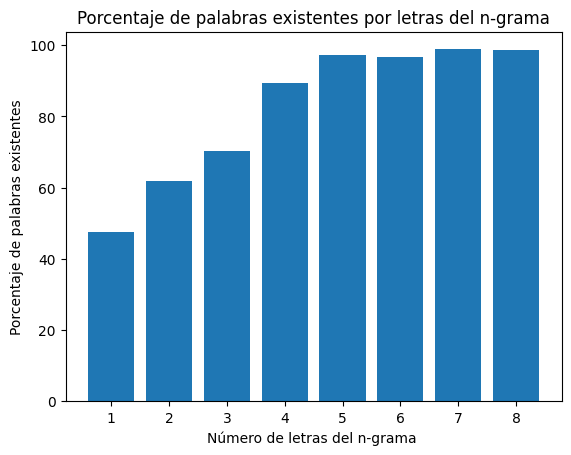

In [110]:
percent = np.zeros(8)
for e in range(8):
    chatGPT = generacion(varios[e],1500,e+1,pagina)
    words = re.findall(r'[a-z]+', chatGPT)
    f = open('gen_text_n' + str(e+1)+'.txt','w')
    f.write(chatGPT)
    f.close()
    count = 0 
    for word in words: 
        if word in res: 
            percent[e] +=1
    percent[e] /= len(words)
    percent[e]*=100
plt.bar(np.arange(1,9),percent)
plt.title("Porcentaje de palabras existentes por letras del n-grama")
plt.ylabel("Porcentaje de palabras existentes")
plt.xlabel("Número de letras del n-grama ")
plt.savefig("4.pdf")

array([1, 2, 3, 4, 5, 6, 7, 8])